CSV saved to: D:\Stelco\Work\Dynamic Correlation\Key\Cross Correlation\5454320_Stand 1 Gap Thread Offset__Driver_Q_VW_OLD_OPTECH__3phase_summary.csv


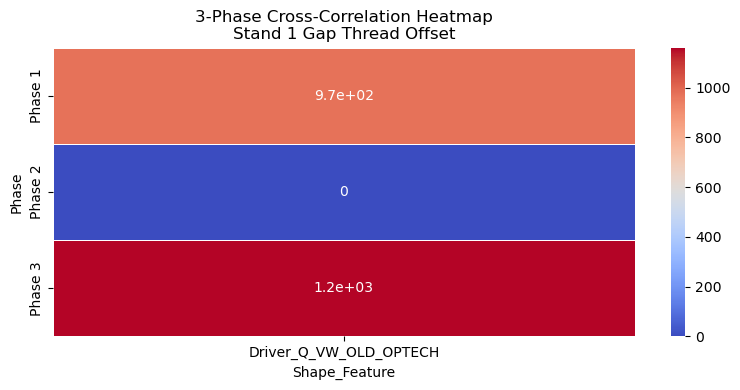

Heatmap saved to: D:\Stelco\Work\Dynamic Correlation\Key\Cross Correlation\5454320_Stand 1 Gap Thread Offset__3phase_heatmap.png
CSV saved to: D:\Stelco\Work\Dynamic Correlation\Key\Cross Correlation\5514593_Neet Oil Concentration__Operator_Q_VW_OLD_OPTECH__3phase_summary.csv


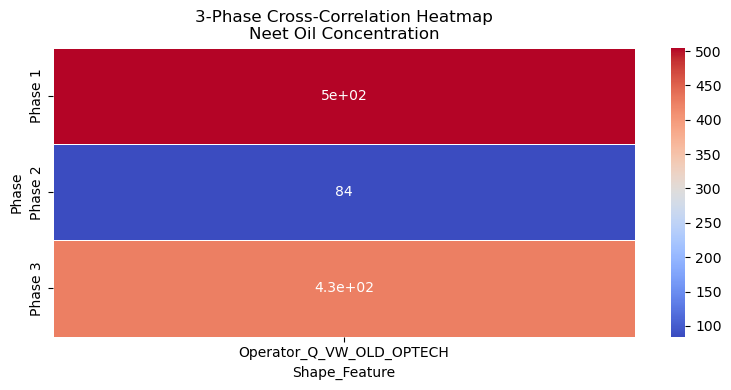

Heatmap saved to: D:\Stelco\Work\Dynamic Correlation\Key\Cross Correlation\5514593_Neet Oil Concentration__3phase_heatmap.png
CSV saved to: D:\Stelco\Work\Dynamic Correlation\Key\Cross Correlation\5453644_Exit Tension Reel Tension Reference__Driver_Q_VW_OLD_OPTECH__3phase_summary.csv


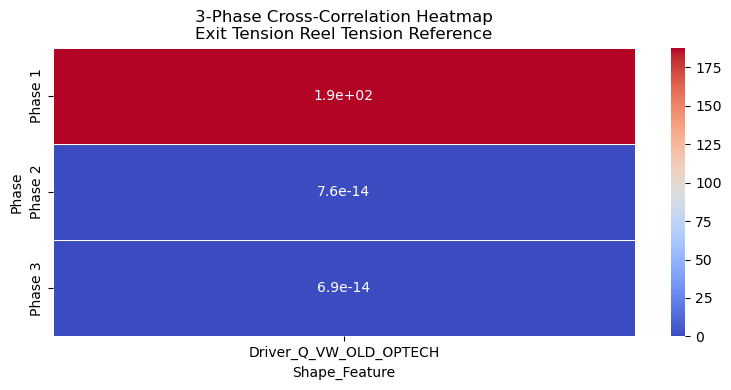

Heatmap saved to: D:\Stelco\Work\Dynamic Correlation\Key\Cross Correlation\5453644_Exit Tension Reel Tension Reference__3phase_heatmap.png

Completed in: 0:00:04.763483


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

start_time = datetime.now()  #Start timer

def cross_corr_phasewise(file_path, iba_signal, shape_feature, output_dir='output'):
    
    df = pd.read_csv(file_path)
    
    if df[ramp_col].max() <= 15:
        return []

    norm_val = df[ramp_col].mode()[0]
    norm_df = df[df[ramp_col] == norm_val]
    if norm_df.empty:
        return []

    phase1_end = norm_df.index[0]
    phase2_end = norm_df.index[-1]

    # Divide into 3 phases
    phase_length = min_len // 3
    phases = {
        'Phase 1': df.iloc[:phase1_end + 1],
        'Phase 2': df.iloc[phase1_end:phase2_end + 1],
        'Phase 3': df.iloc[phase2_end + 1:]
    }

    summary = []
    for phase_name, (px, py) in phases.items():
        if len(px) < 2 or len(py) < 2:
            continue

        cross_corr_vals = np.correlate(px - px.mean(), py - py.mean(), mode='full')
        lags = np.arange(-len(px) + 1, len(px))
        best_lag = lags[np.argmax(cross_corr_vals)]
        max_corr = np.max(cross_corr_vals)

        summary.append({
            'Coil_ID': os.path.basename(file_path).split('.')[0],
            'Phase': phase_name,
            'IBA_Signal': iba_signal,
            'Shape_Feature': shape_feature,
            'Best_Lag': best_lag,
            'Max_Cross_Corr': max_corr
        })

    # Summary CSV
    summary_df = pd.DataFrame(summary)
    csv_path = os.path.join(output_dir, f"{os.path.basename(file_path).split('.')[0]}_{iba_signal}__{shape_feature}__3phase_summary.csv")
    summary_df.to_csv(csv_path, index=False)
    print(f"CSV saved to: {csv_path}")

    # Heatmap
    heatmap_data = summary_df.pivot(index="Phase", columns="Shape_Feature", values="Max_Cross_Corr")
    plt.figure(figsize=(8, 4))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(f"3-Phase Cross-Correlation Heatmap\n{iba_signal}")
    plt.tight_layout()
    heatmap_path = os.path.join(output_dir, f"{os.path.basename(file_path).split('.')[0]}_{iba_signal}__3phase_heatmap.png")
    plt.savefig(heatmap_path)
    plt.show()
    print(f"Heatmap saved to: {heatmap_path}")

cross_corr_phasewise(
    file_path = r"D:\Stelco\Work\Dynamic Correlation\Key\Master whole Phase\5454320.csv",
    iba_signal ='Stand 1 Gap Thread Offset',
    shape_feature='Driver_Q_VW_OLD_OPTECH',
    output_dir=r"D:\Stelco\Work\Dynamic Correlation\Key\Cross Correlation"
)

cross_corr_phasewise(
    file_path=r"D:\Stelco\Work\Dynamic Correlation\Key\Master whole Phase\5514593.csv",
    iba_signal='Neet Oil Concentration',
    shape_feature='Operator_Q_VW_OLD_OPTECH',
    output_dir = r"D:\Stelco\Work\Dynamic Correlation\Key\Cross Correlation"
)

cross_corr_phasewise(
    file_path=r"D:\Stelco\Work\Dynamic Correlation\Key\Master whole Phase\5453644.csv",
    iba_signal='Exit Tension Reel Tension Reference',
    shape_feature='Driver_Q_VW_OLD_OPTECH',
    output_dir = r"D:\Stelco\Work\Dynamic Correlation\Key\Cross Correlation"
)

#End timer
end_time = datetime.now()
elapsed = end_time - start_time
print(f"\nCompleted in: {elapsed}")